In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
current_directory = os.getcwd()
print(current_directory)

C:\Users\lalep\OneDrive - Queen's University\Documents\Queens University\MMAI 823 - AI in Finance\Final Project\MMAI-823-Final-Project\Amir


In [3]:
data = pd.read_csv('output.csv')

In [4]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [5]:
data.head()

,score,id,comms_num,timestamp,text,original_text,Weekday,negative_score,positive_score,neutral_score,compound_score,overall_sentiment,text_sentiment_polarity,text_sentiment_subjectivity
0,55,l6ulcx,6,2021-01-28 21:37:41,money sending message 🚀 💎 🙌,"It's not about the money, it's about sending a...",Thursday,0.000,0.000,1.000,0.0000,Neutral,0.000000,0.000000
1,110,l6uibd,23,2021-01-28 21:32:10,math professor scott steiner says numbers spel...,Math Professor Scott Steiner says the numbers ...,Thursday,0.313,0.000,0.687,-0.6249,Negative,0.000000,0.000000
2,0,l6uhhn,47,2021-01-28 21:30:35,exit system ceo nasdaq pushed halt trading inv...,Exit the system The CEO of NASDAQ pushed to ha...,Thursday,0.112,0.125,0.763,0.3400,Positive,-0.000923,0.389370
3,29,l6ugk6,74,2021-01-28 21:28:57,new sec filing gme retarded interpret,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,Thursday,0.425,0.000,0.575,-0.5719,Negative,-0.254545,0.618182
4,71,l6ufgy,156,2021-01-28 21:26:56,distract gme thought amc brothers aware,"Not to distract from GME, just thought our AMC...",Thursday,0.306,0.000,0.694,-0.2960,Negative,0.250000,0.250000


In [6]:
# Find the minimum and maximum values of the "timestamp" column
min_timestamp = data['timestamp'].min()
max_timestamp = data['timestamp'].max()

# Print the results
print("Minimum Timestamp:", min_timestamp)
print("Maximum Timestamp:", max_timestamp)

Minimum Timestamp: 2021-01-28 09:08:16
Maximum Timestamp: 2021-08-16 09:26:20


In [7]:
df_sorted_sentiment = data.sort_values('timestamp')
df_sorted_sentiment.head()

,score,id,comms_num,timestamp,text,original_text,Weekday,negative_score,positive_score,neutral_score,compound_score,overall_sentiment,text_sentiment_polarity,text_sentiment_subjectivity
257,50,l6h58v,8,2021-01-28 09:08:16,autists journeymonth storytime,An autists journey. $150 to $68k in one month....,Thursday,0.000,0.000,1.000,0.0000,Neutral,0.000000,0.000000
256,70,l6h59b,7,2021-01-28 09:08:17,melvin live,You all have made Melvin live up to its name,Thursday,0.000,0.000,1.000,0.0000,Neutral,0.136364,0.500000
255,75,l6h5a2,14,2021-01-28 09:08:18,got late gme believe cause willing lose guys a...,I got in late on GME but I believe in the caus...,Thursday,0.190,0.206,0.603,0.1779,Positive,0.030000,0.726667
254,26,l6h5am,22,2021-01-28 09:08:19,highest si float end business jan th according...,Highest SI % of Float End of Business Jan 27th...,Thursday,0.000,0.059,0.941,0.2960,Positive,0.000000,0.000000
252,0,l6h5bt,6,2021-01-28 09:08:21,discord nt talk anti bot measure admin contact...,Discord still down i can't see how to talk to ...,Thursday,0.271,0.245,0.483,0.0772,Positive,0.400000,0.800000


In [8]:
df_daily_compound = df_sorted_sentiment.groupby(pd.Grouper(key='timestamp', freq='D')).agg({'compound_score': 'mean'}).reset_index()

In [9]:
df_daily_compound['sentiment_signal'] = df_daily_compound['compound_score'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

In [11]:
df_daily_compound.set_index('timestamp', inplace=True)
df_daily_compound.head(100)

KeyError: "None of ['timestamp'] are in the columns"

In [11]:
stockList = ["GME", "AMC"]

In [12]:
startDate = "2021-01-28"
endDate = "2021-08-16"

In [13]:
df = yf.download(stockList, start=startDate, end=endDate)

[*********************100%***********************]  2 of 2 completed


In [14]:
df.head()

Adj Close             Close              High                Low  \
                 AMC        GME    AMC        GME    AMC         GME    AMC   
Date                                                                          
2021-01-28      8.63  48.400002   8.63  48.400002  16.50  120.750000   6.51   
2021-01-29     13.26  81.250000  13.26  81.250000  16.00  103.495003  11.60   
2021-02-01     13.30  56.250000  13.30  56.250000  17.25   80.500000  12.91   
2021-02-02      7.82  22.500000   7.82  22.500000  10.10   39.500000   6.00   
2021-02-03      8.97  23.102501   8.97  23.102501   9.77   28.350000   7.89   

                      Open                Volume             
                GME    AMC        GME        AMC        GME  
Date                                                         
2021-01-28  28.0625  11.98  66.250000  591223900  235263200  
2021-01-29  62.5000  14.31  94.927498  602193300  202264400  
2021-02-01  53.0000  17.00  79.139999  434608000  149528800  
2021-02-02  18.5550   9.48  35.189999  462775900  312732400  
2021-02-03  21.3125   8.85  28.002501  221405100  170794000

In [15]:
# Calculate daily returns
df['AMC_returns'] = df['Adj Close']['AMC'].pct_change()
df['GME_returns'] = df['Adj Close']['GME'].pct_change()

In [16]:
# Define the momentum threshold
threshold = 0.02

In [17]:
# Generate trading signals
df['AMC_signal'] = np.where(df['AMC_returns'] > threshold, 1, np.where(df['AMC_returns'] < -threshold, -1, 0))
df['GME_signal'] = np.where(df['GME_returns'] > threshold, 1, np.where(df['GME_returns'] < -threshold, -1, 0))

In [18]:
# Apply trading signals and calculate portfolio returns
df['AMC_portfolio_returns'] = df['AMC_signal'] * df['AMC_returns']
df['GME_portfolio_returns'] = df['GME_signal'] * df['GME_returns']

In [19]:
# Calculate cumulative returns
df['AMC_cumulative_returns'] = (1 + df['AMC_portfolio_returns']).cumprod()
df['GME_cumulative_returns'] = (1 + df['GME_portfolio_returns']).cumprod()

In [20]:
# Calculate performance metrics
amc_annualized_returns = ((df['AMC_cumulative_returns'].iloc[-1])**(252/len(df)) - 1)
gme_annualized_returns = ((df['GME_cumulative_returns'].iloc[-1])**(252/len(df)) - 1)
amc_sharpe_ratio = (df['AMC_portfolio_returns'].mean() / df['AMC_portfolio_returns'].std()) * np.sqrt(252)
gme_sharpe_ratio = (df['GME_portfolio_returns'].mean() / df['GME_portfolio_returns'].std()) * np.sqrt(252)

# Print performance metrics
print("AMC Annualized Returns:", amc_annualized_returns)
print("AMC Sharpe Ratio:", amc_sharpe_ratio)
print("GME Annualized Returns:", gme_annualized_returns)
print("GME Sharpe Ratio:", gme_sharpe_ratio)

AMC Annualized Returns: 107462437.74341734
AMC Sharpe Ratio: 11.580093543587369
GME Annualized Returns: 18448192.806042016
GME Sharpe Ratio: 8.648473911634307


In [21]:
df.head()

Adj Close             Close              High                Low  \
                 AMC        GME    AMC        GME    AMC         GME    AMC   
Date                                                                          
2021-01-28      8.63  48.400002   8.63  48.400002  16.50  120.750000   6.51   
2021-01-29     13.26  81.250000  13.26  81.250000  16.00  103.495003  11.60   
2021-02-01     13.30  56.250000  13.30  56.250000  17.25   80.500000  12.91   
2021-02-02      7.82  22.500000   7.82  22.500000  10.10   39.500000   6.00   
2021-02-03      8.97  23.102501   8.97  23.102501   9.77   28.350000   7.89   
2021-02-04      7.09  13.375000   7.09  13.375000   8.74   22.875000   7.00   
2021-02-05      6.83  15.942500   6.83  15.942500   8.27   23.750000   6.52   
2021-02-08      6.18  15.000000   6.18  15.000000   6.89   18.165001   5.75   
2021-02-09      5.50  12.577500   5.50  12.577500   5.81   14.250000   5.26   
2021-02-10      5.80  12.800000   5.80  12.800000   6.59   15.707500   5.45   
2021-02-11      5.61  12.775000   5.61  12.775000   5.85   13.830000   5.47   
2021-02-12      5.59  13.100000   5.59  13.100000   5.97   13.810000   5.52   
2021-02-16      5.65  12.377500   5.65  12.377500   6.05   13.375000   5.49   
2021-02-17      5.55  11.485000   5.55  11.485000   5.62   12.797500   5.32   
2021-02-18      5.51  10.172500   5.51  10.172500   6.25   12.217500   5.46   
2021-02-19      5.70  10.147500   5.70  10.147500   5.77   10.972500   5.51   
2021-02-22      6.55  11.500000   6.55  11.500000   6.68   12.127500   5.75   
2021-02-23      7.70  11.242500   7.70  11.242500   7.86   11.557500   6.01   
2021-02-24      9.09  22.927500   9.09  22.927500   9.83   22.927500   6.99   
2021-02-25      8.29  27.182501   8.29  27.182501  11.00   46.169998   7.85   

                      Open                Volume            AMC_returns  \
                GME    AMC        GME        AMC        GME               
Date                                                                      
2021-01-28  28.0625  11.98  66.250000  591223900  235263200         NaN   
2021-01-29  62.5000  14.31  94.927498  602193300  202264400    0.536501   
2021-02-01  53.0000  17.00  79.139999  434608000  149528800    0.003017   
2021-02-02  18.5550   9.48  35.189999  462775900  312732400   -0.412030   
2021-02-03  21.3125   8.85  28.002501  221405100  170794000    0.147059   
2021-02-04  13.3325   8.70  22.797501  162985800  249709200   -0.209588   
2021-02-05  12.7725   7.17  13.510000  197097600  325380000   -0.036671   
2021-02-08  14.5050   6.88  18.102501  128171500  102749200   -0.095168   
2021-02-09  11.6300   5.81  14.152500  102588100  107372400   -0.110032   
2021-02-10  11.6375   5.71  12.692500  152810800  145820000    0.054545   
2021-02-11  12.0550   5.62  12.502500   55920400   52226800   -0.032759   
2021-02-12  12.0125   5.72  12.687500   46773000   58293200   -0.003565   
2021-02-16  12.2600   6.03  13.165000   61165700   32700000    0.010733   
2021-02-17  11.1400   5.58  12.442500   38849000   36747200   -0.017699   
2021-02-18  10.1625   5.84  12.122500  130540800   95962400   -0.007207   
2021-02-19   9.6250   5.54  10.320000   40249100   59312800    0.034483   
2021-02-22  10.6000   5.93  11.672500  173409000   77904000    0.149123   
2021-02-23  10.0000   6.97  11.242500  264876400   30260800    0.175572   
2021-02-24  11.1750   7.23  11.175000  376881800  332446800    0.180520   
2021-02-25  25.2500  10.89  42.389999  445717400  601235200   -0.088009   

           GME_returns AMC_signal GME_signal AMC_portfolio_returns  \
                                                                     
Date                                                                 
2021-01-28         NaN          0          0                   NaN   
2021-01-29    0.678719          1          1              0.536501   
2021-02-01   -0.307692          0         -1              0.000000   
2021-02-02   -0.600000         -1         -1   

In [26]:
signal_df = df[['AMC_signal','GME_signal']]

In [27]:
signal_df['sentiment_signal'] = df_daily_compound['sentiment_signal']

C:\Users\lalep\AppData\Local\Temp\ipykernel_21000\1542785379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal_df['sentiment_signal'] = df_daily_compound['sentiment_signal']


In [28]:
df_daily_compound['sentiment_signal']

timestamp
2021-01-28    1
2021-01-29   -1
2021-01-30    1
2021-01-31    1
2021-02-01    1
             ..
2021-08-12    1
2021-08-13    1
2021-08-14    1
2021-08-15    1
2021-08-16    1
Name: sentiment_signal, Length: 201, dtype: int64

In [29]:
signal_df.head()

,AMC_signal,GME_signal,sentiment_signal
,,,
Date,,,
2021-01-28,0,0,1
2021-01-29,1,1,-1
2021-02-01,0,-1,1
2021-02-02,-1,-1,1
2021-02-03,1,1,1


In [36]:
# Calculate the rolling standard deviation (volatility) for AMC and GME
window = 30  # Adjust the window size as desired
df['AMC_volatility'] = df['AMC_returns'].rolling(window).std()
df['GME_volatility'] = df['GME_returns'].rolling(window).std()

In [43]:
# Set the threshold for volatility-based trading decisions
threshold = 0.02  # Adjust the threshold as desired

In [44]:
# Initialize new columns for trading signals
df['AMC_signal_V'] = 0
df['GME_signal_V'] = 0

In [45]:
# Generate trading signals based on volatility
df.loc[df['AMC_volatility'] > threshold, 'AMC_signal_V'] = 1
df.loc[df['AMC_volatility'] < -threshold, 'AMC_signal_V'] = -1
df.loc[df['GME_volatility'] > threshold, 'GME_signal_V'] = 1
df.loc[df['GME_volatility'] < -threshold, 'GME_signal_V'] = -1

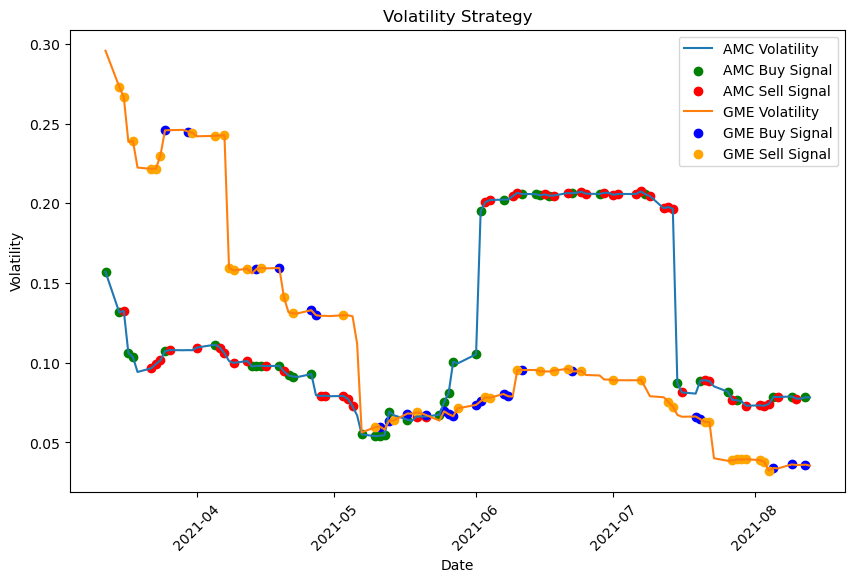

In [46]:
# Plotting the volatility and trading signals
plt.figure(figsize=(10, 6))

# Plotting the AMC volatility and trading signals
plt.plot(df.index, df['AMC_volatility'], label='AMC Volatility')
buy_signals_amc = df[df['AMC_signal'] == 1]
sell_signals_amc = df[df['AMC_signal'] == -1]
plt.scatter(buy_signals_amc.index, df.loc[buy_signals_amc.index, 'AMC_volatility'], color='green', label='AMC Buy Signal')
plt.scatter(sell_signals_amc.index, df.loc[sell_signals_amc.index, 'AMC_volatility'], color='red', label='AMC Sell Signal')

# Plotting the GME volatility and trading signals
plt.plot(df.index, df['GME_volatility'], label='GME Volatility')
buy_signals_gme = df[df['GME_signal'] == 1]
sell_signals_gme = df[df['GME_signal'] == -1]
plt.scatter(buy_signals_gme.index, df.loc[buy_signals_gme.index, 'GME_volatility'], color='blue', label='GME Buy Signal')
plt.scatter(sell_signals_gme.index, df.loc[sell_signals_gme.index, 'GME_volatility'], color='orange', label='GME Sell Signal')

# Set the x-axis label to 'Date'
plt.xlabel('Date')

# Set the y-axis label to 'Volatility'
plt.ylabel('Volatility')

# Set the title of the plot
plt.title('Volatility Strategy')

# Show the legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [49]:
df.head()

Adj Close             Close              High                Low  \
                 AMC        GME    AMC        GME    AMC         GME    AMC   
Date                                                                          
2021-01-28      8.63  48.400002   8.63  48.400002  16.50  120.750000   6.51   
2021-01-29     13.26  81.250000  13.26  81.250000  16.00  103.495003  11.60   
2021-02-01     13.30  56.250000  13.30  56.250000  17.25   80.500000  12.91   
2021-02-02      7.82  22.500000   7.82  22.500000  10.10   39.500000   6.00   
2021-02-03      8.97  23.102501   8.97  23.102501   9.77   28.350000   7.89   

                      Open             ... AMC_signal GME_signal  \
                GME    AMC        GME  ...                         
Date                                   ...                         
2021-01-28  28.0625  11.98  66.250000  ...          0          0   
2021-01-29  62.5000  14.31  94.927498  ...          1          1   
2021-02-01  53.0000  17.00  79.139999  ...          0         -1   
2021-02-02  18.5550   9.48  35.189999  ...         -1         -1   
2021-02-03  21.3125   8.85  28.002501  ...          1          1   

           AMC_portfolio_returns GME_portfolio_returns AMC_cumulative_returns  \
                                                                                
Date                                                                            
2021-01-28                   NaN                   NaN                    NaN   
2021-01-29              0.536501              0.678719               1.536501   
2021-02-01              0.000000              0.307692               1.536501   
2021-02-02              0.412030              0.600000               2.169585   
2021-02-03              0.147059              0.026778               2.488642   

           GME_cumulative_returns AMC_volatility GME_volatility AMC_signal_V  \
                                                                               
Date                                                                           
2021-01-28                    NaN            NaN            NaN            0   
2021-01-29               1.678719            NaN            NaN            0   
2021-02-01               2.195248            NaN            NaN            0   
2021-02-02               3.512397            NaN            NaN            0   
2021-02-03               3.606451            NaN            NaN            0   

           GME_signal_V  
                         
Date                     
2021-01-28            0  
2021-01-29            0  
2021-02-01            0  
2021-02-02            0  
2021-02-03            0  

[5 rows x 24 columns]

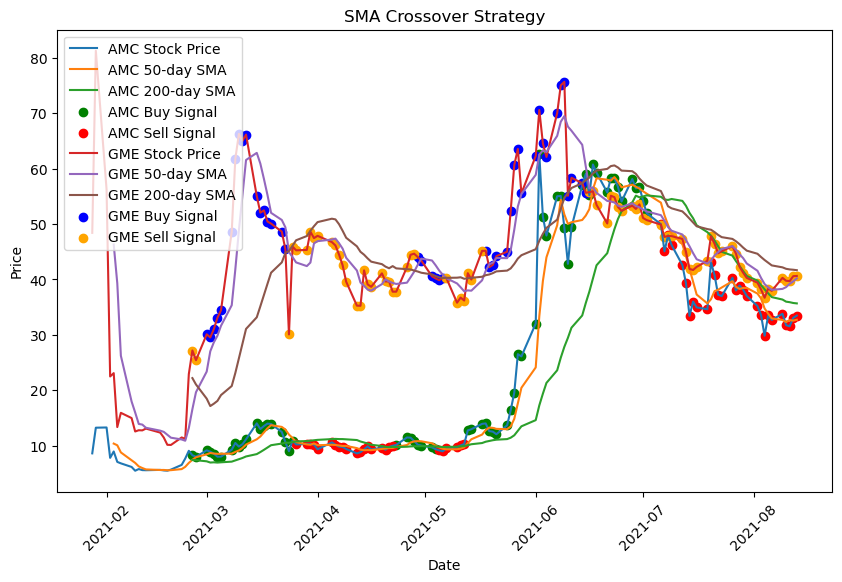

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the updated DataFrame with the necessary columns and date as the index
# Replace df with your actual DataFrame

# Calculate the 50-day and 200-day simple moving averages (SMA) for AMC and GME
df['AMC_sma_50'] = df['Adj Close']['AMC'].rolling(window=5).mean()
df['AMC_sma_200'] = df['Adj Close']['AMC'].rolling(window=20).mean()
df['GME_sma_50'] = df['Adj Close']['GME'].rolling(window=5).mean()
df['GME_sma_200'] = df['Adj Close']['GME'].rolling(window=20).mean()

# Initialize new columns for trading signals
df['AMC_signal'] = 0
df['GME_signal'] = 0

# Generate trading signals based on SMA crossover
df.loc[df['AMC_sma_50'] > df['AMC_sma_200'], 'AMC_signal'] = 1
df.loc[df['AMC_sma_50'] < df['AMC_sma_200'], 'AMC_signal'] = -1
df.loc[df['GME_sma_50'] > df['GME_sma_200'], 'GME_signal'] = 1
df.loc[df['GME_sma_50'] < df['GME_sma_200'], 'GME_signal'] = -1

# Plotting the SMA crossover and trading signals
plt.figure(figsize=(10, 6))

# Plotting the AMC stock price and SMA crossover
plt.plot(df.index, df['Adj Close']['AMC'], label='AMC Stock Price')
plt.plot(df.index, df['AMC_sma_50'], label='AMC 50-day SMA')
plt.plot(df.index, df['AMC_sma_200'], label='AMC 200-day SMA')

# Plotting the buy and sell signals for AMC
buy_signals_amc = df[df['AMC_signal'] == 1]
sell_signals_amc = df[df['AMC_signal'] == -1]
plt.scatter(buy_signals_amc.index, df.loc[buy_signals_amc.index, 'Adj Close']['AMC'], color='green', label='AMC Buy Signal')
plt.scatter(sell_signals_amc.index, df.loc[sell_signals_amc.index, 'Adj Close']['AMC'], color='red', label='AMC Sell Signal')

# Plotting the GME stock price and SMA crossover
plt.plot(df.index, df['Adj Close']['GME'], label='GME Stock Price')
plt.plot(df.index, df['GME_sma_50'], label='GME 50-day SMA')
plt.plot(df.index, df['GME_sma_200'], label='GME 200-day SMA')

# Plotting the buy and sell signals for GME
buy_signals_gme = df[df['GME_signal'] == 1]
sell_signals_gme = df[df['GME_signal'] == -1]
plt.scatter(buy_signals_gme.index, df.loc[buy_signals_gme.index, 'Adj Close']['GME'], color='blue', label='GME Buy Signal')
plt.scatter(sell_signals_gme.index, df.loc[sell_signals_gme.index, 'Adj Close']['GME'], color='orange', label='GME Sell Signal')

# Set the x-axis label to 'Date'
plt.xlabel('Date')

# Set the y-axis label to 'Price'
plt.ylabel('Price')

# Set the title of the plot
plt.title('SMA Crossover Strategy')

# Show the legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()